<H1>MADATORY PYTHON LIBRARIES</H1>

In [1]:
%matplotlib  inline
import xarray
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams.update({'font.size': 15})

<h1>IN SITU VESSELS</h1>

In Situ 'vessels' comprehends a wide range of devices on board of vessels like Thermosalinometers, CTDs, MiniLoggers, Ferriboxes, XBTs, Bottles, BATHY and TESAC. Depending on the device, vessels provides data time series of certain parameters along its trajectory either for the upper watter surface (time series) or along the water column (profiles). It's platform data types are TS, CT, ML, FB, XB, BO, BA and TE:

In [2]:
data = { 'PR (profile)': [' -', ' ✔',' ✔ ', ' ✔',' ✔', '  ✔',' ✔', ' ✔'], 'TS (time serie)': [' ✔', ' -',' - ', ' - ',' - ', ' -', '- ', ' -']}
pd.DataFrame(data=data, index=['TS (thermosalinomter)', 'CT (CTDs)', 'ML (Miniloggers)', 'FB (Ferribox)', 'XB (XBTs)', 'BO (Bottles)', 'BA (BATHY)', 'TE (TESAC)'])

,PR (profile),TS (time serie)
TS (thermosalinomter),-,✔
CT (CTDs),✔,-
ML (Miniloggers),✔,-
FB (Ferribox),✔,-
XB (XBTs),✔,-
BO (Bottles),✔,-
BA (BATHY),✔,-
TE (TESAC),✔,-


<h1>PLOTTING PROFILES</h1>

Imagine you have downloaded some <i>_PF_ (profiles)</i> dataset from In Situ vessels (see how to download files from a  certain [platform data source](https://github.com/CopernicusMarineInsitu/INSTACTraining-Phase2UPDATE/blob/master/PythonNotebooks/In_Situ_data_download_by_platform_data_source.ipynb) or [platform category](https://github.com/CopernicusMarineInsitu/INSTACTraining-Phase2UPDATE/blob/master/PythonNotebooks/In_Situ_data_download_by_platform_category.ipynb)) like: [MO_PR_CT_EABV_2013.nc](ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/history/vessel/MO_PR_CT_EABV_2013.nc)

In [3]:
dataset = 'MO_PR_CT_EABV_2013.nc'

Let's have a look to its content:

In [4]:
full_path2file = os.getcwd()+'/'+dataset #default to current directory
print('path2file: %s'%(full_path2file))

path2file: /home/protllan/code/Training/INSTACTraining-PhaseII/PythonNotebooks/MO_PR_CT_EABV_2013.nc


In [5]:
ds = xarray.open_dataset(dataset)

ds contains all the information about the dataset (relevant metadata, variables, dimensions etc):

In [6]:
ds

<xarray.Dataset>
Dimensions:             (DEPTH: 189, LATITUDE: 28, LONGITUDE: 28, POSITION: 28, TIME: 28)
Coordinates:
  * TIME                (TIME) datetime64[ns] 2013-12-02T12:34:57.014400 ...
  * LATITUDE            (LATITUDE) float64 39.0 39.0 39.45 39.0 38.8 39.32 ...
  * LONGITUDE           (LONGITUDE) float64 1.121 1.195 2.318 0.7367 0.9914 ...
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC             (TIME) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    POSITION_QC         (POSITION) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    DATA_MODE           (TIME) object 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' ...
    DIRECTION           (TIME) object 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' ...
    CNDC                (TIME, DEPTH) float64 4.781 4.782 4.782 4.782 4.787 ...
    CNDC_QC             (TIME, DEPTH) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    DOWNWELLING_PAR     (TIME, DEPTH) float64 18.62 11.17 8.382 6.304 4.723 ...
    DOWNWELLING_PAR_QC  (TIM

these attributes can be accesed individually; i.e:

In [7]:
ds.variables.keys()

[u'TIME',
 u'TIME_QC',
 u'LATITUDE',
 u'LONGITUDE',
 u'POSITION_QC',
 u'DATA_MODE',
 u'DIRECTION',
 u'CNDC',
 u'CNDC_QC',
 u'DOWNWELLING_PAR',
 u'DOWNWELLING_PAR_QC',
 u'DOX1',
 u'DOX1_QC',
 u'FLU2',
 u'FLU2_QC',
 u'LGH4',
 u'LGH4_QC',
 u'PRES',
 u'PRES_QC',
 u'PSAL',
 u'PSAL_QC',
 u'SIGMA_THETA',
 u'SIGMA_THETA_QC',
 u'TEMP',
 u'TEMP_QC',
 u'TUR4',
 u'TUR4_QC']

Every of the above parameters varies along certain dimensions (within parenthesis when checking the parameter metadata):

In [8]:
ds['TEMP']

<xarray.DataArray 'TEMP' (TIME: 28, DEPTH: 189)>
array([[ 16.6546  ,  16.6563  ,  16.6493  , ...,        nan,        nan,
               nan],
       [ 16.574301,  16.5961  ,  16.5972  , ...,        nan,        nan,
               nan],
       [ 15.9273  ,  15.93    ,  15.9294  , ...,        nan,        nan,
               nan],
       ..., 
       [ 17.189699,  17.132299,  17.0459  , ...,        nan,        nan,
               nan],
       [ 17.2344  ,  17.2211  ,  17.2132  , ...,        nan,        nan,
               nan],
       [ 17.151699,  17.1371  ,  17.095699, ...,        nan,        nan,
               nan]])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2013-12-02T12:34:57.014400 ...
Dimensions without coordinates: DEPTH
Attributes:
    long_name:      Sea temperature
    standard_name:  sea_water_temperature
    units:          degrees_C

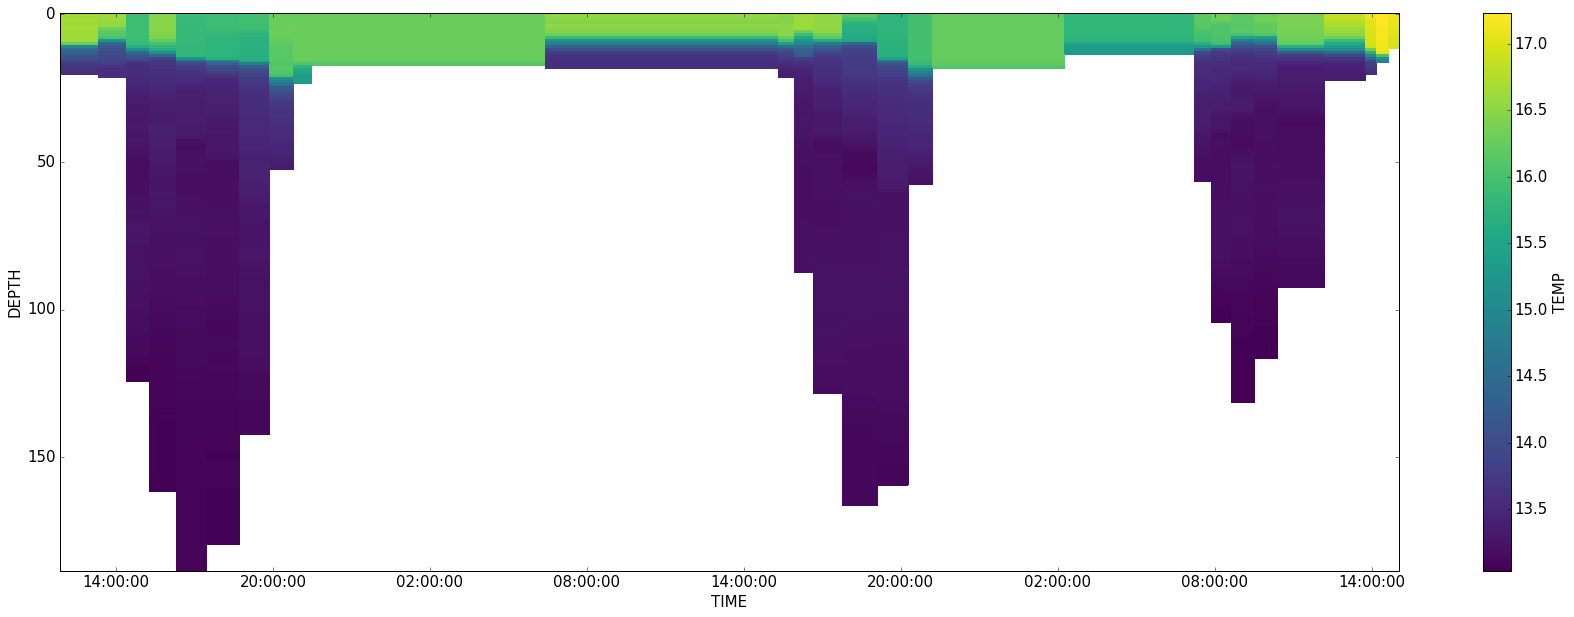

In [9]:
ds['TEMP'].plot(x='TIME', y='DEPTH',aspect=3, size=10)
plt.gca().invert_yaxis()

Every of the above variables have a corresponding '_QC' variable, which is the variable that contains the data quality flags:

In [10]:
ds['TEMP_QC']

<xarray.DataArray 'TEMP_QC' (TIME: 28, DEPTH: 189)>
array([[  1.,   1.,   1., ...,  nan,  nan,  nan],
       [  1.,   1.,   1., ...,  nan,  nan,  nan],
       [  1.,   1.,   1., ...,  nan,  nan,  nan],
       ..., 
       [  1.,   1.,   1., ...,  nan,  nan,  nan],
       [  1.,   1.,   1., ...,  nan,  nan,  nan],
       [  1.,   1.,   1., ...,  nan,  nan,  nan]])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2013-12-02T12:34:57.014400 ...
Dimensions without coordinates: DEPTH
Attributes:
    long_name:      quality flag
    conventions:    OceanSITES reference table 2
    valid_min:      0
    valid_max:      9
    flag_values:    [0 1 2 3 4 5 6 7 8 9]
    flag_meanings:  no_qc_performed good_data probably_good_data bad_data_tha...

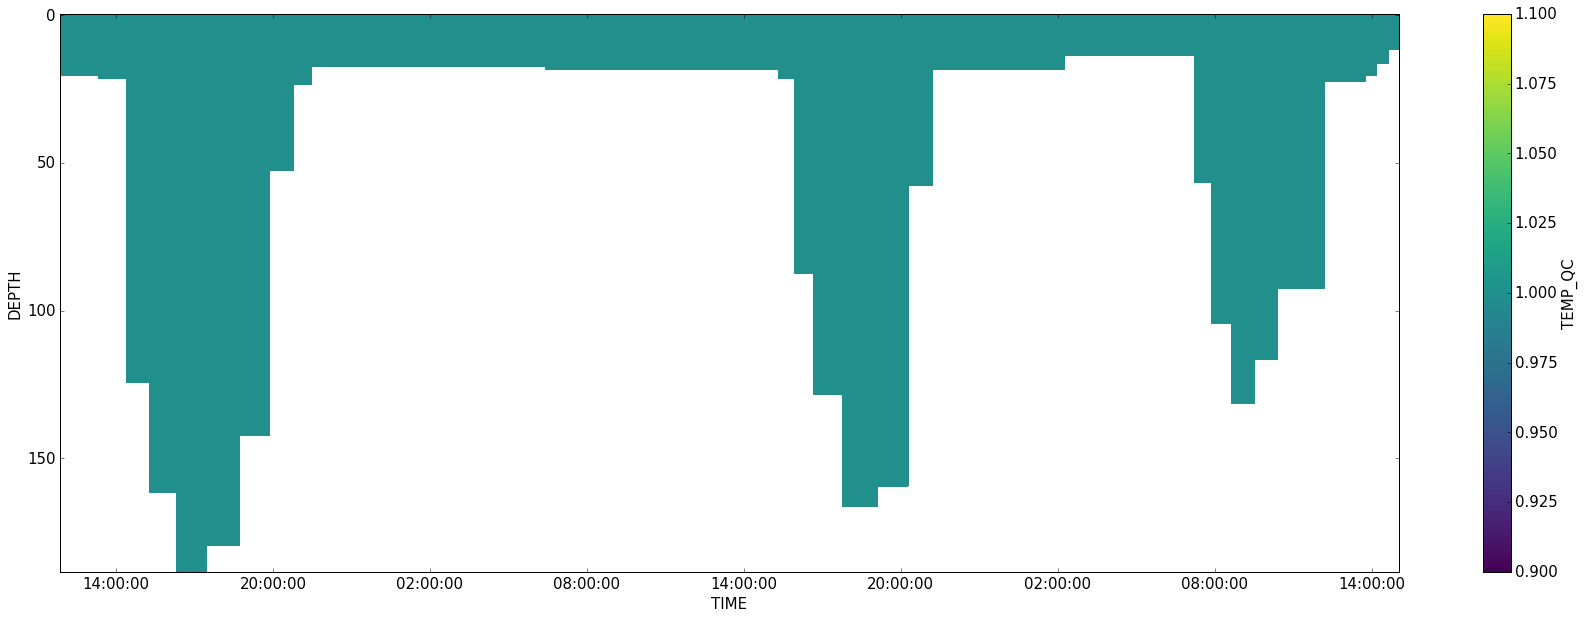

In [11]:
ds['TEMP_QC'].plot(x='TIME', y='DEPTH',aspect=3, size=10)
plt.gca().invert_yaxis()

This '_QC' variable will therefore guide us when when working with the parameter data to distinguish good from bad data:

In [12]:
pd.DataFrame(data=ds['TEMP_QC'].attrs['flag_values'], index = ds['TEMP_QC'].attrs['flag_meanings'].split(' '), columns = ['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
not_used,6
nominal_value,7
interpolated_value,8
missing_value,9


In this case all is flagged as 1 (good) so we go straight to try a different colormap for example:

In [13]:
cmap = plt.cm.Spectral_r

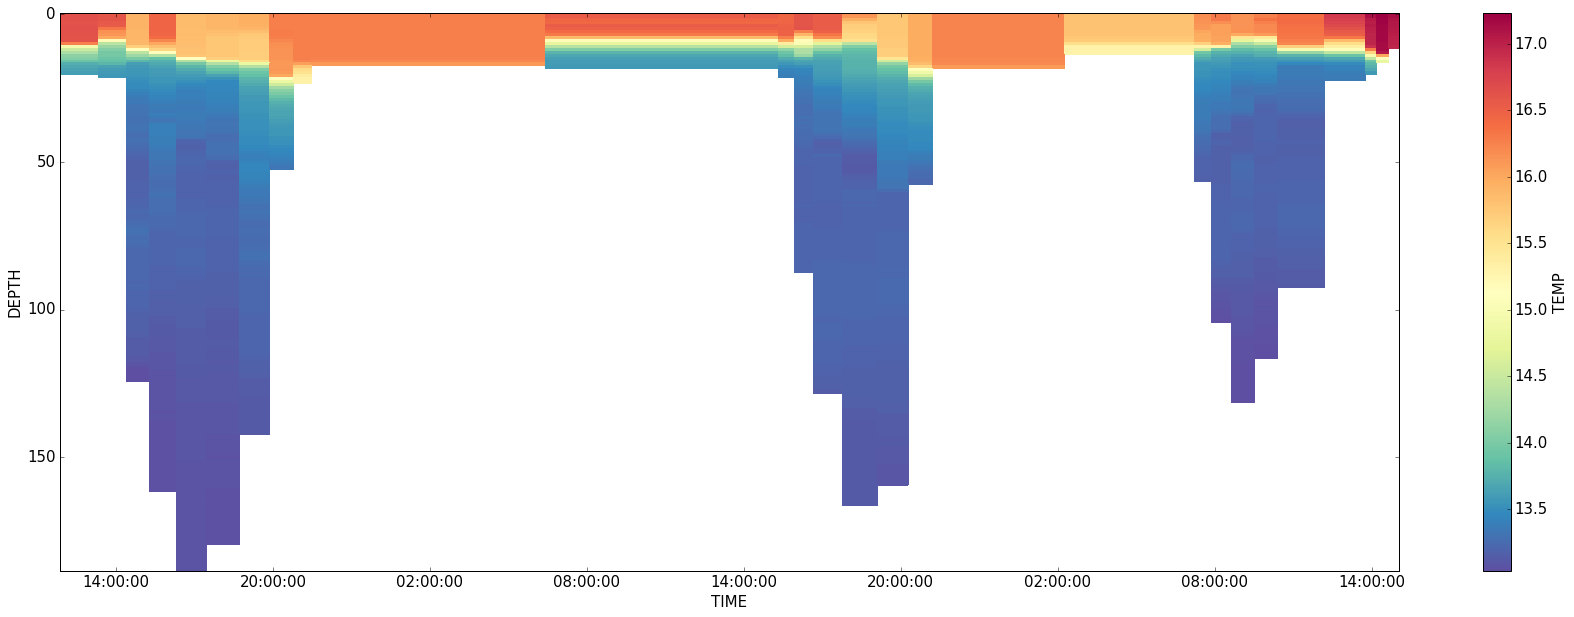

In [15]:
ds['TEMP'].plot(x='TIME', y='DEPTH',aspect=3, size=10, cmap=cmap)
plt.gca().invert_yaxis()